In [1]:
import glob
from pathlib import Path
from zipfile import ZipFile
import quakeio
from matplotlib import pyplot as plt
import json, os
from libs.compute_params import QuakeIOWaveforms

### 1) List of `station_codes`

In [2]:
data_dir = '/Users/utpalkumar/Library/CloudStorage/Box-Box'


in_dir = Path(os.path.join(data_dir, "NSMP/buildings", "motions_ready"))    # set this as the directory where you have saved the zip files

in_patterns = ["[NWP][PR]????", "CE?????"]
station_dirs = []
for i in in_patterns:
    station_dirs.extend(in_dir.glob(i))
station_codes = [station_dir.name for station_dir in station_dirs]
print(station_codes)

['NP7215', 'NP7010', 'NP5233', 'NP5407', 'NP1833', 'NP1867', 'NP5439', 'NP5406', 'NP5243', 'NP5082', 'NP1811', 'NP5446', 'NP1227', 'NP2838', 'NP5245', 'NP5485', 'NP5449', 'NP1446', 'NP5229', 'NP1226', 'NP5478', 'NP8016', 'NP8045', 'NP1103', 'NP8042', 'NP2716', 'NP3095', 'NP7237', 'NP7413', 'NP1745', 'NP5239', 'NP5405', 'NP1230', 'NP2210', 'NP1662', 'NP1239', 'NP1812', 'NP2656', 'PRB03L', 'NP1225', 'NP5410', 'NP5284', 'NP2544', 'NP7235', 'NP5106', 'NP8040', 'NP5501', 'NP3096', 'CE58389']


### 2) Read the data from the `i`th event of `my_station`

In [3]:
my_station = "NP1103"  # set this as the station code of interest
# my_station = "NP1662"  
i = 0                  # set this as the event number of interest

events = glob.glob(os.path.join(data_dir, f"NSMP/buildings/motions_ready/{my_station}/*p.zip"))

quakeio_instance = QuakeIOWaveforms(events[i])

In [23]:
event_motions = quakeio_instance.get_motions()
# print(event_motions, type(event_motions))

all_locations = list(event_motions.keys())
print(all_locations)
all_components = event_motions[all_locations[0]].components
print(all_components.values()[0].accel)
# print(all_components[0].accel)

# for motion in event_motions.values():
#     for comp in motion.components.values():
#         print(comp.location_name)
    #     print(quakeio_instance.get_location_coordinates(comp.location))
        

['4th floor, east core', '4th floor, west core', 'Basement, east side', 'Basement, west core', 'Roof, center of bldg', 'Roof, east core', 'Roof, SW corner', '4th floor, west core_anothaone', '4th floor, west core_anothaone_anothaone', 'Basement, east side_anothaone', 'Basement, east side_anothaone_anothaone', 'Basement, west core_anothaone', 'Basement, west core_anothaone_anothaone', 'Roof, east core_anothaone', 'Roof, east core_anothaone_anothaone', 'Roof, SW corner_anothaone', 'Roof, SW corner_anothaone_anothaone', 'Roof, west core']


TypeError: 'dict_values' object is not subscriptable

events = ['/Users/utpalkumar/Library/CloudStorage/Box-Box/NSMP/buildings/motions_ready/NP1103/piedmont_17aug2015_72507396_np1103p.zip', '/Users/utpalkumar/Library/CloudStorage/Box-Box/NSMP/buildings/motions_ready/NP1103/lomaprieta_17oct1989_np01103p.zip', '/Users/utpalkumar/Library/CloudStorage/Box-Box/NSMP/buildings/motions_ready/NP1103/berkeley_04jan2018_72948801_np1103p.zip']
Reading event /Users/utpalkumar/Library/CloudStorage/Box-Box/NSMP/buildings/motions_ready/NP1103/piedmont_17aug2015_72507396_np1103p.zip
dict_keys(['location_name'])
dict_keys(['location_name'])
dict_keys(['location_name'])
dict_keys(['location_name'])
dict_keys(['location_name'])
dict_keys(['location_name'])
dict_keys(['location_name'])
dict_keys(['location_name'])
dict_keys(['location_name'])
dict_keys(['location_name'])
dict_keys(['location_name'])
dict_keys(['location_name'])
dict_keys(['location_name'])
dict_keys(['location_name'])
dict_keys(['location_name'])
dict_keys(['location_name'])
dict_keys(['locat

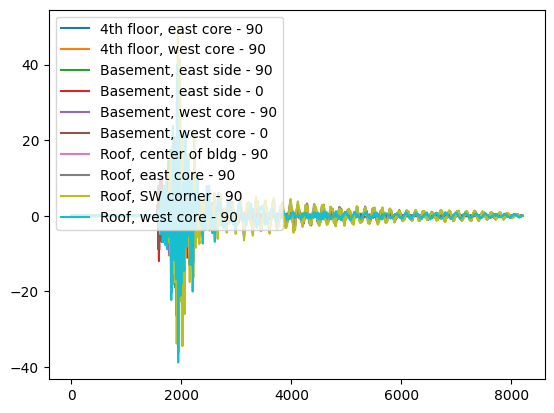

In [4]:

my_station = "NP1103"  # set this as the station code of interest
# my_station = "NP1662"  
i = 0                  # set this as the event number of interest

events = glob.glob(os.path.join(data_dir, f"NSMP/buildings/motions_ready/{my_station}/*p.zip"))

print(f"events = {events}")
# if len(events) == 0:
#     print(f"No events found for station {my_station}")
#     exit()
# else:
#     print(f"Found {len(events)} events for station {my_station}")

with ZipFile(events[i], "r") as readfile:
    if any('.smc' in name for name in readfile.namelist()):
        parser = 'smc.read_event'
    else:
        parser = None

print(f"Reading event {events[i]}")
event_processed = quakeio.read(events[i], parser=parser, summarize=False)
channel_locations = event_processed.motions

# print(event_processed.motions)

for motion in event_processed.motions.values():
    # print(motion.keys())
    for component in motion.components.values():
        # cha_num = component["station_channel"]
        # direction = component.get("component","none")
        # event_processed.match("l", station_channel=f"{cha_num}").accel.data
        if component.accel is not None:
            plt.plot(component.accel.data, label=f"{motion['location_name']} - {component.get('component', '?')}")
plt.legend()

# Some stations of interest:
# Berkeley; Great Western Savings -- NSMP Station 1103
# San Francisco; Transamerica Tower -- NSMP Station 1239
# San Francisco; Chevron Bldg; Structure Array 1 -- NSMP Station 1446
# Emeryville; Pacific Park Plaza; Structure Array 1 -- NSMP Station 1662
# CA:SF;New Federal Bld; 1st level -- NSMP Station 1866
# CA:SF; FDIC; 23rd Fl NW side -- NSMP Station 1876
# MO:St Louis;One Bell Ctr -- NSMP Station 2490
# MA:Cambridge;MIT Green Bld 54 -- NSMP Station 2656
# AK:Anchorage;Hilton Hotel -- NSMP Station 2716
# Alhambra; LA County Public Works Hdqtrs -- NSMP Station 0482
# CA Long Beach - VAMC, Bldg 126 -- NSMP Station 5106
# Los Angeles; 1100 Wilshire -- NSMP Station 5233
# Los Angeles; UCLA Factor Bldg -- NSMP Station 5405
# CA:San Diego;US Crthse Annex; 3rd Fl NW -- NSMP Station 5502
# San Francisco - 62-story Resid. Bldg -- CGS - CSMIP Station 58389
# WA:Seattle;Crowne Plaza Hotel -- NSMP Station 7010
# WA:Seattle;New Fed Courthouse -- NSMP Station 7050
# AK:Anchorage;BP Bld -- NSMP Station 8016
# Anchorage - R B Atwood Bldg -- NSMP Station 8040
# Los Angeles; Century City, 2049 CPE -- NSMP Station 0981
# Los Angeles; Century City, 2029 CPE -- NSMP Station 0982
# El Castillo Building -- Puerto Rico UPRM Station B03L